# Overlapping spikes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import similarity
from scipy.signal import medfilt
import scipy.stats as scs
import gitInformation

In [2]:
gitInformation.printInformation()

Information about this notebook
Date: 2016-11-28
Python Version: 2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Git directory: C:\Users\Dowa\Desktop\IpythonNotebook\kt-2015-DSPHandsOn\.git
Current git SHA: 6578577558c102ca718910c86d4bcdcdb4c1a9f7
Remotes: origin, 
Current branch: master
origin remote URL: https://github.com/dowa4213/kt-2015-DSPHandsOn.git


In [3]:
%matplotlib inline

In [4]:
# Overlapping traingles(used as spikes) with different width.
tri1 = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0])
tri1 = tri1/5.
tri2 = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 3, 4, 5, 4, 3, 2, 1, 0])
tri2 = tri2/5.
tri3 = np.array([0, 1, 2, 3, 4, 5, 4, 3,  4, 5, 4, 3, 2, 1, 0])
tri3 = tri3/5.
tri4 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 7, 6, 5, 4, 3,  4, 5, 6, 7, 8, 7, 6, 5, 4, 3, 2, 1, 0])
tri4 = tri4/8.

In [5]:
# Append multiple overlappings spikes with a gap of 30 between them
x = np.zeros(30)
data1 = np.append(tri1,x)
for i in range(5):
    data1 = np.append(data1,tri1)
    data1 = np.append(data1,x)

In [6]:
data2 = np.append(tri2,x)
for i in range(5):
    data2 = np.append(data2,tri2)
    data2 = np.append(data2,x)

In [7]:
data3 = np.append(tri3,x)
for i in range(5):
    data3 = np.append(data3,tri3)
    data3 = np.append(data3,x)

In [8]:
data4 = np.append(tri4,x)
for i in range(5):
    data4 = np.append(data4,tri4)
    data4 = np.append(data4,x)

In [9]:
wl = np.array([3, 5, 11, 15, 17, 21, 25, 31, 35, 39, 45, 47, 51, 55, 57, 61, 75])

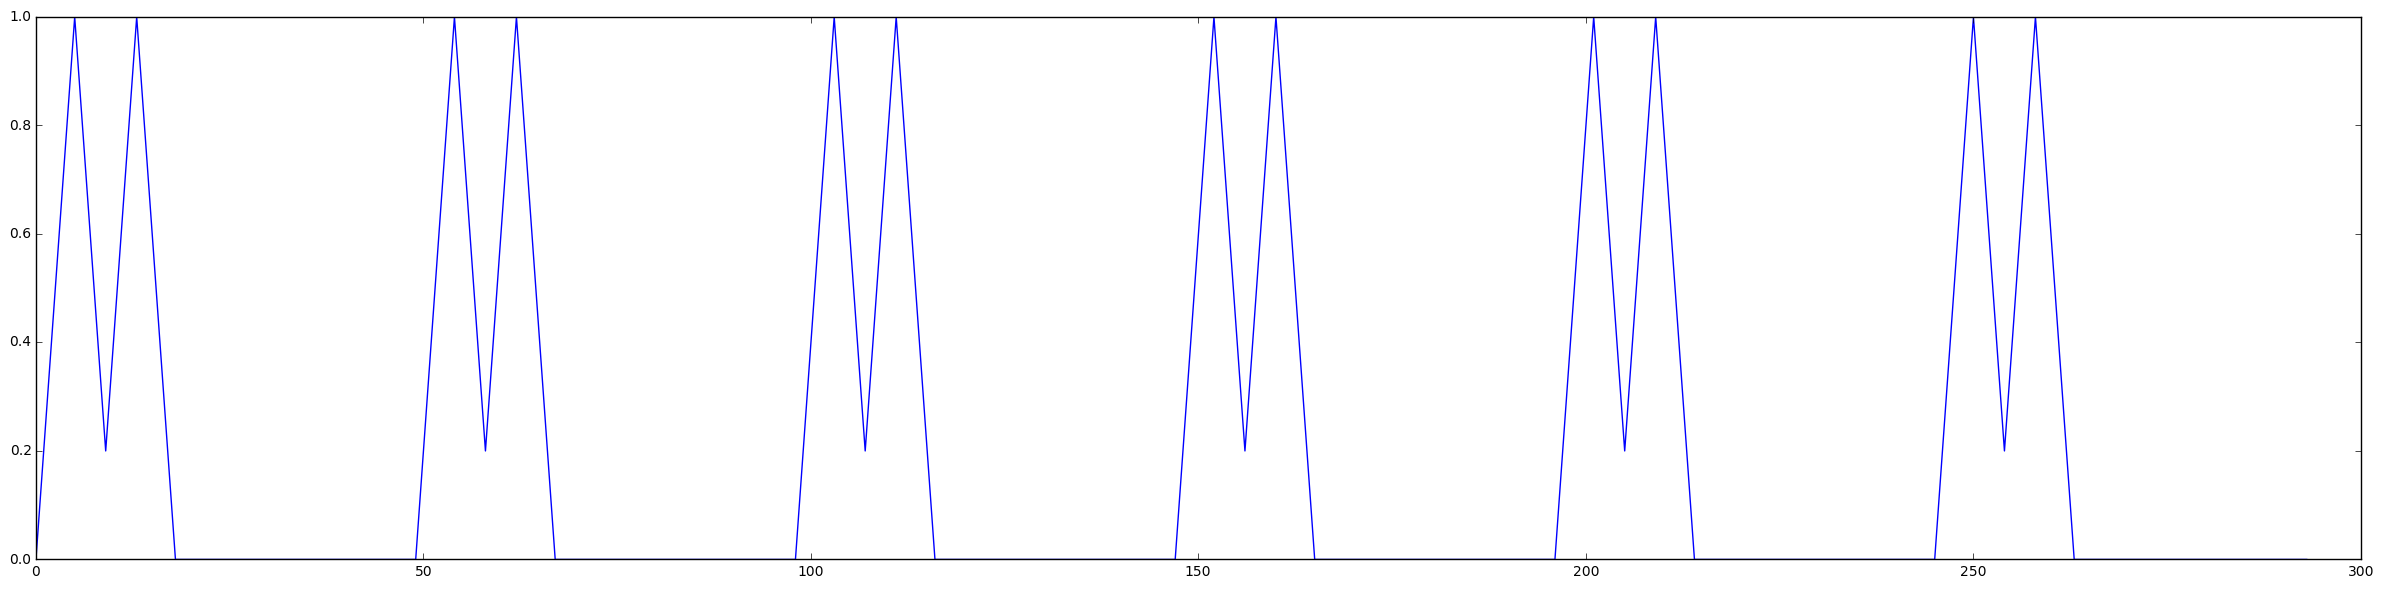

In [23]:
plt.figure(figsize=(30,7))
plt.plot(data1)

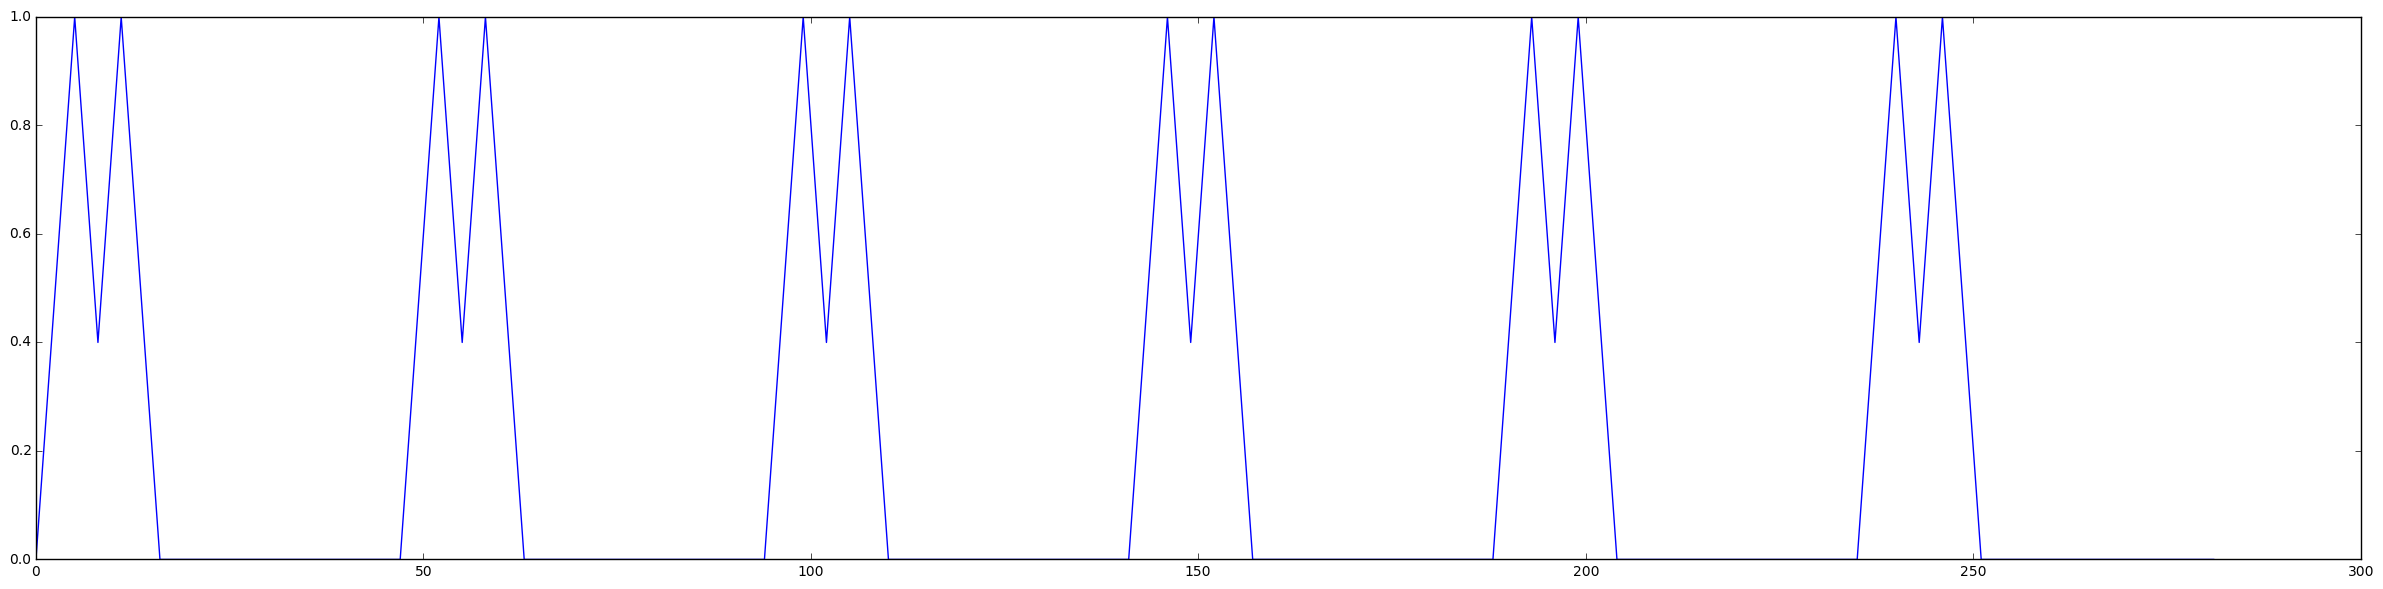

In [25]:
plt.figure(figsize=(30,7))
plt.plot(data2)

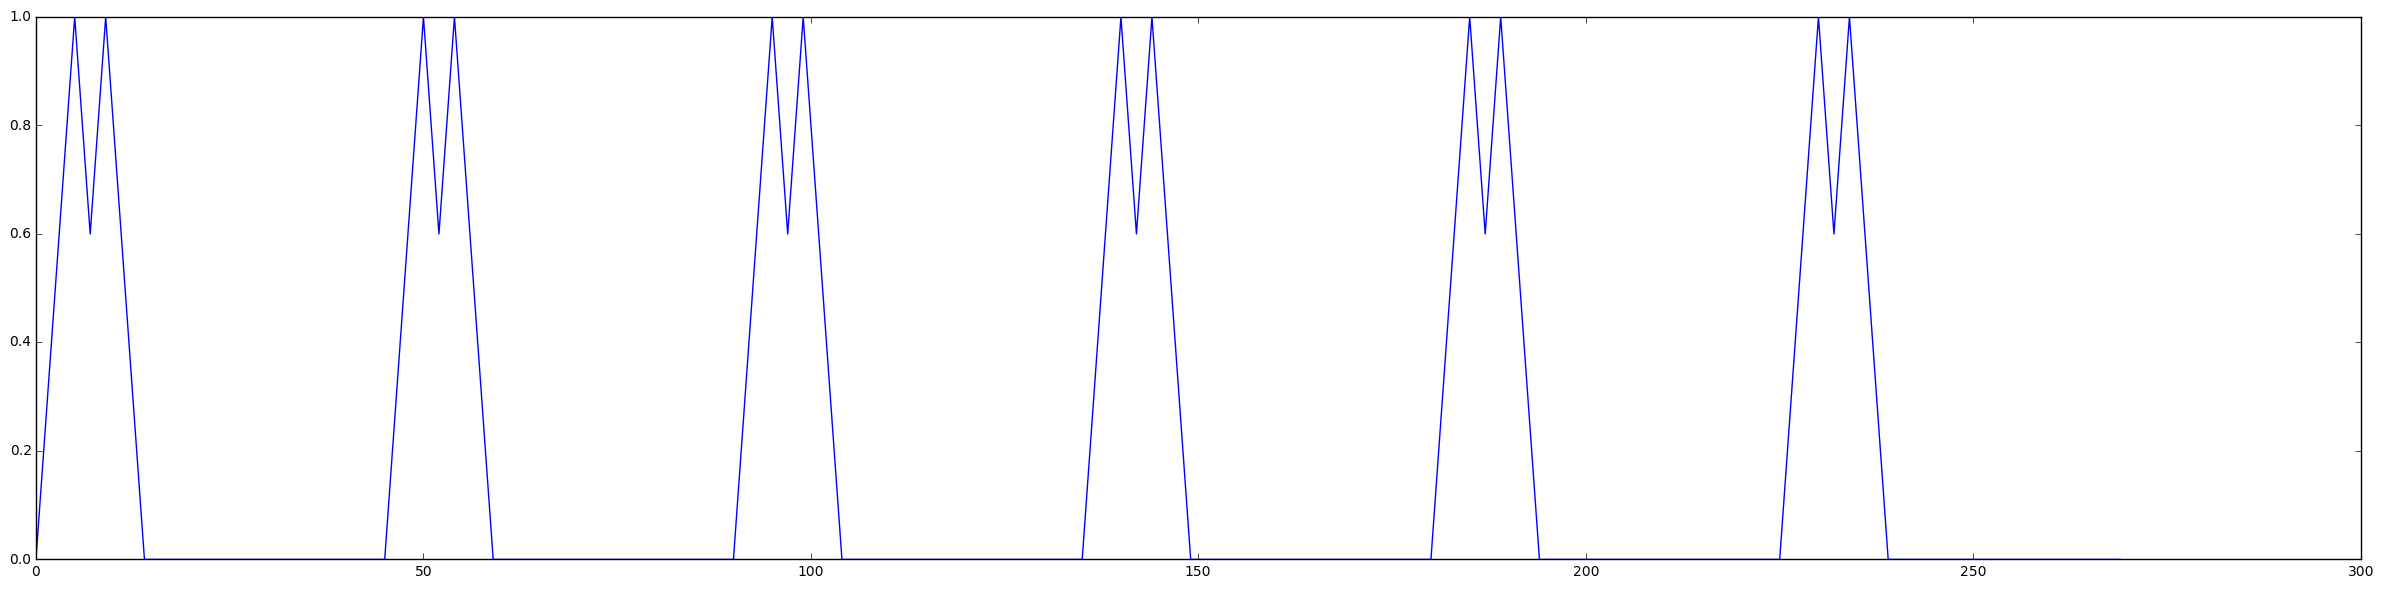

In [28]:
plt.figure(figsize=(30,7))
plt.plot(data3)

### Similarity for Data1

In [12]:
rms1 = np.zeros(140)
euclidean1 = np.zeros(140)
manhatten1 = np.zeros(140)
cosine1 = np.zeros(140)
jaccard1 = np.zeros(140)
corrCoef1 = np.zeros(140)

valuesRms1 = np.zeros(len(wl))
valuesEuclid1 = np.zeros(len(wl))
valuesManhatten1 = np.zeros(len(wl))
valuesCosine1 = np.zeros(len(wl))
valuesJaccard1 = np.zeros(len(wl))
valuesCorr1 = np.zeros(len(wl))

In [13]:
filtered1 = np.zeros((140, len(data1)))
filtered_spikes = np.zeros((140, len(data1)))
sim = similarity()

count = -1
for w in wl:
    count += 1
    for i in range(len(filtered1)):
        data1_noised = data1 + np.random.normal(0, 0.15, len(data1))
        filtered1[i,:] = medfilt(data1_noised, w)
        filtered_spikes[i,:] = data1_noised - filtered1[i,:]
        temp = filtered_spikes[i,:]
        only_spikes = []
        only_spikes2 = []
        for p in range(0,len(data1),49):
            only_spikes = np.append(only_spikes, temp[p:p+19])
            only_spikes2 = np.append(only_spikes2, data1_noised[p:p+19])
            
        rms1[i] = np.sqrt(np.mean(np.square(only_spikes)))
        euclidean1[i] = sim.euclideanDistance(only_spikes, only_spikes2)
        manhatten1[i] = sim.manhattanDistance(only_spikes,only_spikes2)
        cosine1[i] = sim.cosineSimilarity(only_spikes, only_spikes2)
        jaccard1[i] = sim.jaccardSimilarity(only_spikes,only_spikes2)
        cc1 = scs.pearsonr(only_spikes,only_spikes2)
        corrCoef1[i] = cc1[0]
        
    meanRms1 = np.mean(rms1)
    meanEuclid1 = np.mean(euclidean1)
    meanManhatten1 = np.mean(manhatten1)
    meanCosine1 = np.mean(cosine1)
    meanJaccard1 = np.mean(jaccard1)
    meanCorr1 = np.mean(corrCoef1)
    
    valuesRms1[count] = meanRms1
    valuesEuclid1[count] = meanEuclid1
    valuesManhatten1[count] = meanManhatten1  
    valuesCosine1[count] = meanCosine1 
    valuesJaccard1[count] = meanJaccard1 
    valuesCorr1[count] = meanCorr1

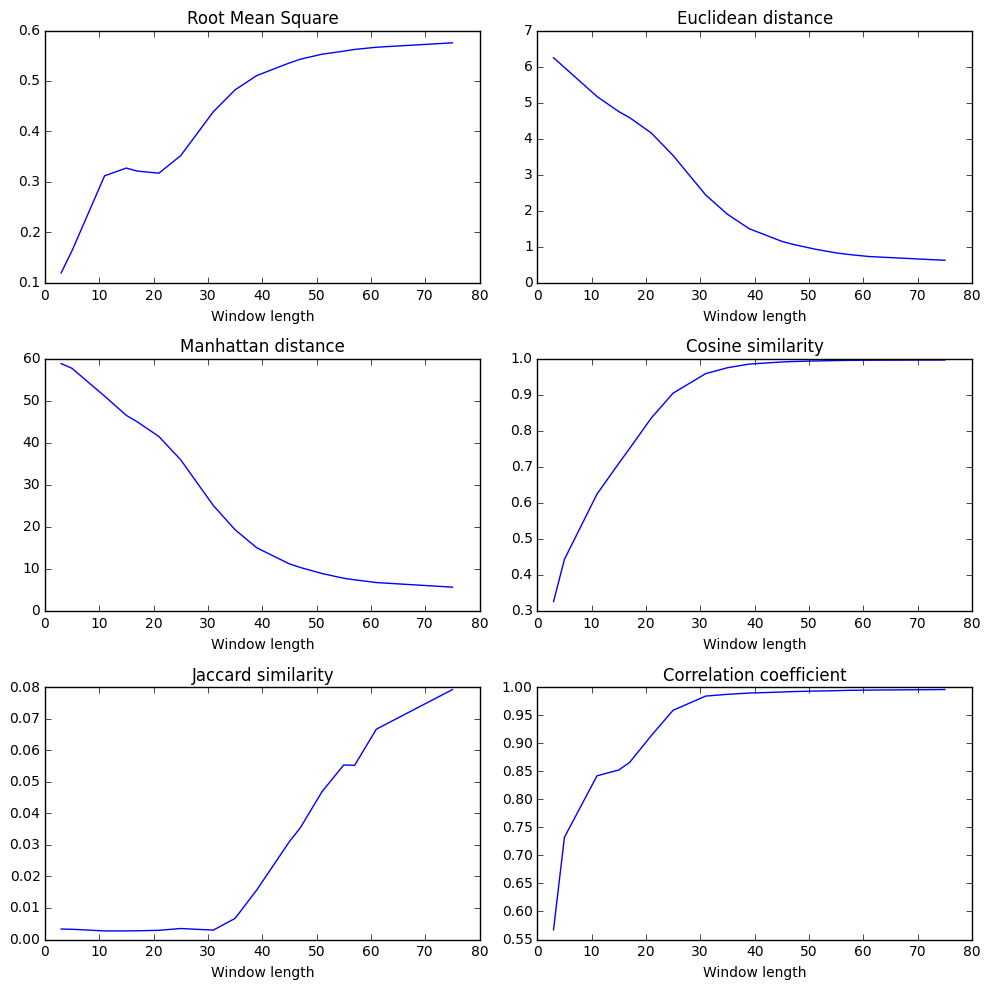

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.plot(wl, valuesRms1)
plt.title("Root Mean Square")
plt.xlabel("Window length")

plt.subplot(322)
plt.plot(wl, valuesEuclid1)
plt.title("Euclidean distance")
plt.xlabel("Window length")

plt.subplot(323)
plt.plot(wl, valuesManhatten1)
plt.title("Manhattan distance")
plt.xlabel("Window length")

plt.subplot(324)
plt.plot(wl, valuesCosine1)
plt.title("Cosine similarity")
plt.xlabel("Window length")

plt.subplot(325)
plt.plot(wl, valuesJaccard1)
plt.title("Jaccard similarity")
plt.xlabel("Window length")

plt.subplot(326)
plt.plot(wl, valuesCorr1)
plt.title("Correlation coefficient")
plt.xlabel("Window length")

plt.tight_layout()ds  

### Similarity for Data2

In [15]:
rms2 = np.zeros(140)
euclidean2 = np.zeros(140)
manhatten2 = np.zeros(140)
cosine2 = np.zeros(140)
jaccard2 = np.zeros(140)
corrCoef2 = np.zeros(140)

valuesRms2 = np.zeros(len(wl))
valuesEuclid2 = np.zeros(len(wl))
valuesManhatten2 = np.zeros(len(wl))
valuesCosine2 = np.zeros(len(wl))
valuesJaccard2 = np.zeros(len(wl))
valuesCorr2 = np.zeros(len(wl))

In [30]:
filtered2 = np.zeros((140, len(data2)))
filtered_spikes = np.zeros((140, len(data2)))

count = -1
for w in wl:
    count += 1
    for i in range(len(filtered2)):
        data2_noised = data2 + np.random.normal(0, 0.15, len(data2))
        filtered2[i,:] = medfilt(data2_noised, w)
        filtered_spikes[i,:] = data2_noised - filtered2[i,:]
        temp = filtered_spikes[i,:]
        only_spikes = []
        only_spikes2 = []
        for p in range(0,len(data2),47):
            only_spikes = np.append(only_spikes, temp[p:p+17])
            only_spikes2 = np.append(only_spikes2, data2_noised[p:p+17])
            
        rms2[i] = np.sqrt(np.mean(np.square(only_spikes)))
        euclidean2[i] = sim.euclideanDistance(only_spikes, only_spikes2)
        manhatten2[i] = sim.manhattanDistance(only_spikes,only_spikes2)
        cosine2[i] = sim.cosineSimilarity(only_spikes, only_spikes2)
        jaccard2[i] = sim.jaccardSimilarity(only_spikes,only_spikes2)
        cc2 = scs.pearsonr(only_spikes,only_spikes2)
        corrCoef2[i] = cc2[0]
        
    meanRms2 = np.mean(rms2)
    meanEuclid2 = np.mean(euclidean2)
    meanManhatten2 = np.mean(manhatten2)
    meanCosine2 = np.mean(cosine2)
    meanJaccard2 = np.mean(jaccard2)
    meanCorr2 = np.mean(corrCoef2)
    
    valuesRms2[count] = meanRms2
    valuesEuclid2[count] = meanEuclid2
    valuesManhatten2[count] = meanManhatten2  
    valuesCosine2[count] = meanCosine2 
    valuesJaccard2[count] = meanJaccard2 
    valuesCorr2[count] = meanCorr2

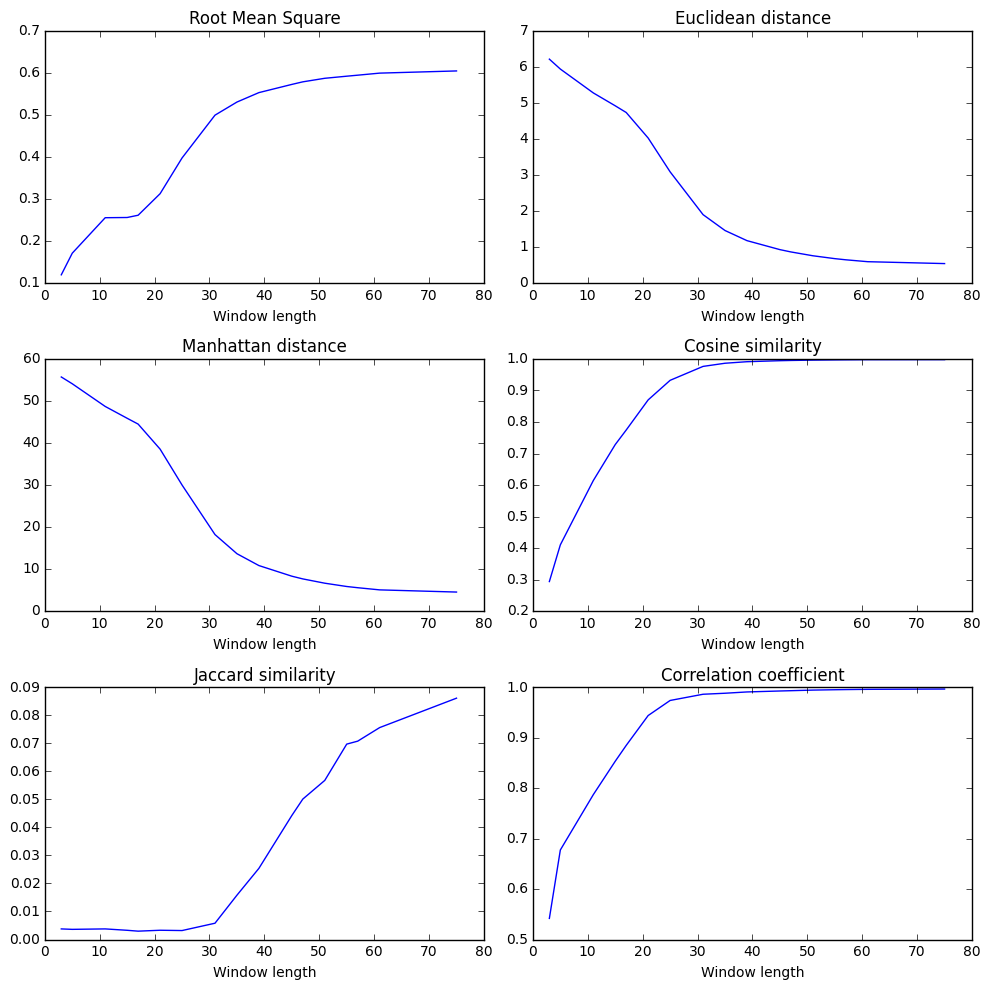

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.plot(wl, valuesRms2)
plt.title("Root Mean Square")
plt.xlabel("Window length")

plt.subplot(322)
plt.plot(wl, valuesEuclid2)
plt.title("Euclidean distance")
plt.xlabel("Window length")

plt.subplot(323)
plt.plot(wl, valuesManhatten2)
plt.title("Manhattan distance")
plt.xlabel("Window length")

plt.subplot(324)
plt.plot(wl, valuesCosine2)
plt.title("Cosine similarity")
plt.xlabel("Window length")

plt.subplot(325)
plt.plot(wl, valuesJaccard2)
plt.title("Jaccard similarity")
plt.xlabel("Window length")

plt.subplot(326)
plt.plot(wl, valuesCorr2)
plt.title("Correlation coefficient")
plt.xlabel("Window length")

plt.tight_layout()

### Similarity for Data3

In [29]:
rms3 = np.zeros(140)
euclidean3 = np.zeros(140)
manhatten3 = np.zeros(140)
cosine3 = np.zeros(140)
jaccard3 = np.zeros(140)
corrCoef3 = np.zeros(140)

valuesRms3 = np.zeros(len(wl))
valuesEuclid3 = np.zeros(len(wl))
valuesManhatten3 = np.zeros(len(wl))
valuesCosine3 = np.zeros(len(wl))
valuesJaccard3 = np.zeros(len(wl))
valuesCorr3 = np.zeros(len(wl))

In [32]:
filtered3 = np.zeros((140, len(data3)))
filtered_spikes = np.zeros((140, len(data3)))

count = -1
for w in wl:
    count += 1
    for i in range(len(filtered3)):
        data3_noised = data3 + np.random.normal(0, 0.15, len(data3))
        filtered3[i,:] = medfilt(data3_noised, w)
        filtered_spikes[i,:] = data3_noised - filtered3[i,:]
        temp = filtered_spikes[i,:]
        only_spikes = []
        only_spikes2 = []
        for p in range(0,len(data3),47):
            only_spikes = np.append(only_spikes, temp[p:p+17])
            only_spikes2 = np.append(only_spikes2, data3_noised[p:p+17])
            
        rms3[i] = np.sqrt(np.mean(np.square(only_spikes)))
        euclidean3[i] = sim.euclideanDistance(only_spikes, only_spikes2)
        manhatten3[i] = sim.manhattanDistance(only_spikes,only_spikes2)
        cosine3[i] = sim.cosineSimilarity(only_spikes, only_spikes2)
        jaccard3[i] = sim.jaccardSimilarity(only_spikes,only_spikes2)
        cc3 = scs.pearsonr(only_spikes,only_spikes2)
        corrCoef3[i] = cc3[0]
        
    meanRms3 = np.mean(rms3)
    meanEuclid3 = np.mean(euclidean3)
    meanManhatten3 = np.mean(manhatten3)
    meanCosine3 = np.mean(cosine3)
    meanJaccard3 = np.mean(jaccard3)
    meanCorr3 = np.mean(corrCoef3)
    
    valuesRms3[count] = meanRms3
    valuesEuclid3[count] = meanEuclid3
    valuesManhatten3[count] = meanManhatten3  
    valuesCosine3[count] = meanCosine3
    valuesJaccard3[count] = meanJaccard3 
    valuesCorr3[count] = meanCorr3

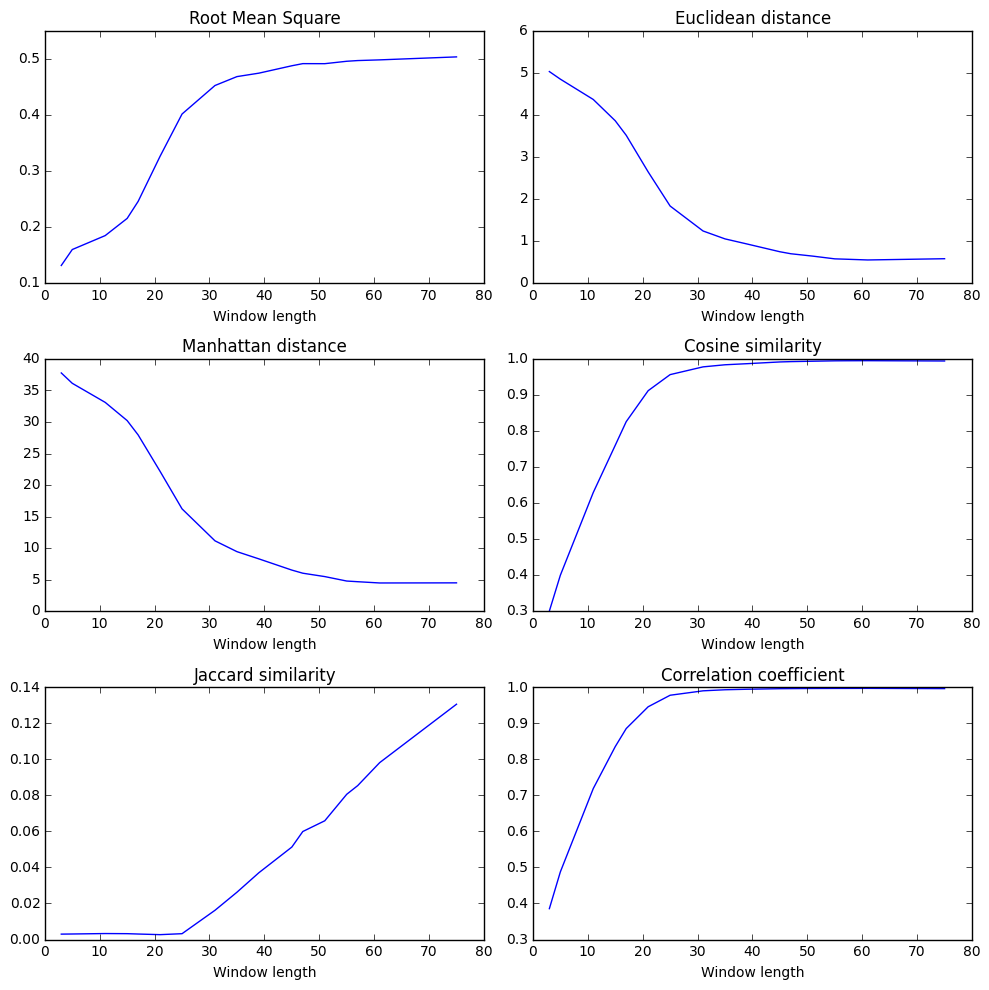

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.plot(wl, valuesRms3)
plt.title("Root Mean Square")
plt.xlabel("Window length")

plt.subplot(322)
plt.plot(wl, valuesEuclid3)
plt.title("Euclidean distance")
plt.xlabel("Window length")

plt.subplot(323)
plt.plot(wl, valuesManhatten3)
plt.title("Manhattan distance")
plt.xlabel("Window length")

plt.subplot(324)
plt.plot(wl, valuesCosine3)
plt.title("Cosine similarity")
plt.xlabel("Window length")

plt.subplot(325)
plt.plot(wl, valuesJaccard3)
plt.title("Jaccard similarity")
plt.xlabel("Window length")

plt.subplot(326)
plt.plot(wl, valuesCorr3)
plt.title("Correlation coefficient")
plt.xlabel("Window length")

plt.tight_layout()